富士山の標高データを 最小化したい目的関数 に見立てて、富士山からの下山プログラムを作成することで勾配降下法を学びます。

標高データの取得
左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。標高と距離の単位はメートルです。300地点のデータです。


In [29]:
import numpy as np

csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=',', skiprows=1)
print(fuji[:10])


[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]]


### 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。



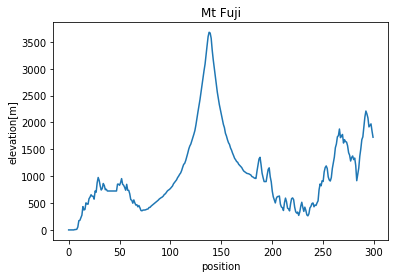

In [30]:
import matplotlib.pyplot as plt


plt.title("Mt Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(df_fuji.x, df_fuji.elevation)
plt.show()

### 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。
勾配=Δy/Δx

In [31]:
def compute_grad(i):
    dx = fuji[i, 0] - fuji[i-1, 0]
    dy = fuji[i, 3] - fuji[i-1, 3]
    grad = dy / dx
    return grad

In [57]:
compute_grad(136)

168.35000000000036

【問題3】移動先の地点を計算する関数を作成  
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。
数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。
「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。
《実装上の注意》
上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。
《ハイパーパラメータとは》
機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [33]:
def compute_point(present_point):
    alpha = 0.2
    grad = compute_grad(present_point)
    next_point = present_point - alpha*grad
    if 0 <= next_point < 300:
        x = round(next_point)
    else:
        x = round(present_point)
    
    return int(x)

In [58]:
compute_point(136)

102

### 【問題4】山を下る関数を作成  
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。
最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。
《実装上の注意》
問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [45]:
def has_duplicates(seq):
    return len(seq) != len(set(seq))

def descent_mount(present_point):
    result = [present_point]
   
    while has_duplicates(result) == False:
        post_x = compute_point(result[-1])
        result.append(post_x)
    result.pop()
        
    return result

In [48]:
descent_mount(136)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

### 【問題5】下山過程の可視化  
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

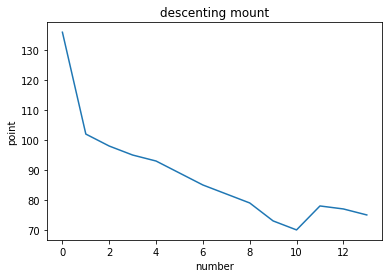

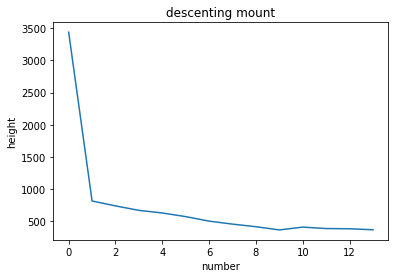

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

x_list = [i for i in range(len(descent_mount(136)))]
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('point')
plt.plot(x_list, descent_mount(136))
plt.show()

height_list = []
for i in descent_mount(136):
    height = fuji[i, 3]
    height_list.append(height)
    
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('height')
plt.plot(x_list, height_list)
plt.show()

### 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。
そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。
機械学習においては 初期値をどう設定するかが結果に影響を与えることが確認できます。

初期値問題は初期値をしらみつぶしに試してみてその中からいくつか選んで可視化するという課題です。
したがって、まずは0-300まで初期値を変化させたものを出力し、その結果からいくつか初期値を選んで可視化してください。

これによって局所最適解が複数あることが確認できると思います。
例えば、初期位置を170などにすると、136にした時とは違い、山の右側のどこかで収束する様子が確認できます。
280あたりにすると、その場所での極値に収束していることが確認できると思います(確認していないですが、、、)

In [50]:
for i in range(len(fuji)):
    y = descent_mount(i)
    print(y)

[0]
[1]
[2]
[3]
[4]
[5]
[6, 5]
[7]
[8, 7]
[9, 1]
[10]
[11, 10]
[12, 2]
[13, 4]
[14]
[15, 27, 31, 51, 41]
[16, 14]
[17]
[18, 22, 13, 4]
[19, 21, 15, 27, 31, 51, 41]
[20]
[21, 15, 27, 31, 51, 41]
[22, 13, 4]
[23, 28]
[24]
[25, 36, 52, 37, 35, 43]
[26]
[27, 31, 51, 41]
[28]
[29, 10]
[30, 41]
[31, 51, 41]
[32, 47]
[33, 27, 31, 51, 41]
[34, 15, 27, 31, 51, 41]
[35, 43]
[36, 52, 37, 35, 43]
[37, 35, 43]
[38, 44]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48, 22, 13, 4]
[49]
[50, 54, 58, 80]
[51, 41]
[52, 37, 35, 43]
[53, 74]
[54, 58, 80]
[55, 63, 74]
[56, 66, 74]
[57, 35, 43]
[58, 80]
[59]
[60, 73, 70, 78, 77, 75]
[61, 83, 80]
[62, 64, 52, 37, 35, 43]
[63, 74]
[64, 52, 37, 35, 43]
[65, 76, 75]
[66, 74]
[67, 66, 74]
[68, 76, 75]
[69, 64, 52, 37, 35, 43]
[70, 78, 77, 75]
[71, 81, 77, 75]
[72, 73, 70, 78, 77, 75]
[73, 70, 78, 77, 75]
[74]
[75]
[76, 75]
[77, 75]
[78, 77, 75]
[79, 73, 70, 78, 77, 75]
[80]
[81, 77, 75]
[82, 79, 73, 70, 78, 77, 75]
[83, 80]
[84, 81, 77, 75]
[85, 82, 79, 73, 70, 

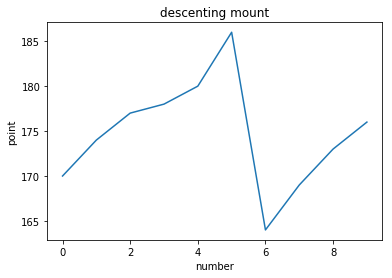

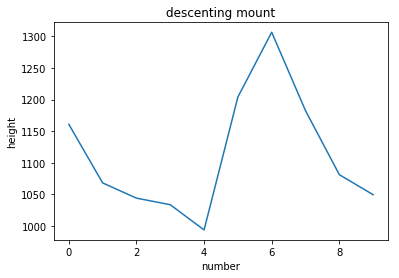

In [53]:
#170番目

x_list_170 = [i for i in range(len(descent_mount(170)))]
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('point')
plt.plot(x_list_170, descent_mount(170))
plt.show()

height_list_170 = []
for i in descent_mount(170):
    height = fuji[i, 3]
    height_list_170.append(height)
    
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('height')
plt.plot(x_list_170, height_list_170)
plt.show()

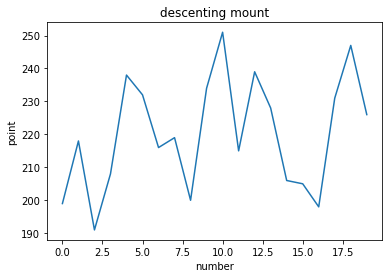

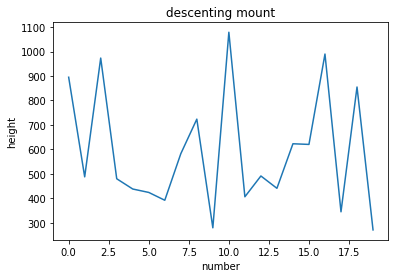

In [52]:
#要素数が最も多い199番目

x_list_199 = [i for i in range(len(descent_mount(199)))]
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('point')
plt.plot(x_list_199, descent_mount(199))
plt.show()

height_list_199 = []
for i in descent_mount(199):
    height = fuji[i, 3]
    height_list_199.append(height)
    
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('height')
plt.plot(x_list_199, height_list_199)
plt.show()

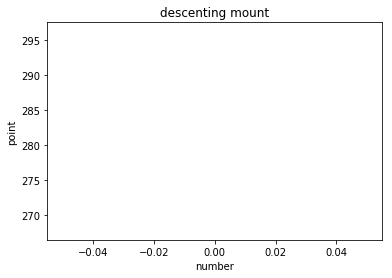

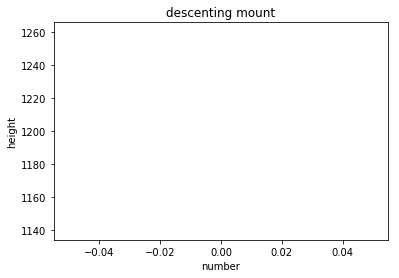

In [55]:
#282番目

x_list_282 = [i for i in range(len(descent_mount(282)))]
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('point')
plt.plot(x_list_282,descent_mount(282))
plt.show()

height_list_282 = []
for i in descent_mount(282):
    height = fuji[i, 3]
    height_list_282.append(height)
    
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('height')
plt.plot(x_list_282, height_list_282)
plt.show()